# Logistic Regression for a Binary Classification of Images

## import library

In [73]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm
import os

## load data

In [74]:
directory_data  = './'
filename_data   = 'assignment_02_data.npz'
path_data       = os.path.join(directory_data, filename_data) 
data            = np.load(path_data)

x = data['x']
y = data['y']

im_0    = x[0,:,:]
im_1    = x[1,:,:]

label_0 = y[0]
label_1 = y[1]

In [75]:
print('size of data :', x.shape)
print('number of images :', x.shape[0])
print('size of image :', x[0,:,:].shape)
print('size of label :', y.shape)

print('data type of image :', x.dtype)
print('data type of label :', y.dtype)

print('number of image :', x.shape[0])
print('height of image :', x.shape[1])
print('width of image :', x.shape[2])

size of data : (2, 28, 28)
number of images : 2
size of image : (28, 28)
size of label : (2,)
data type of image : float64
data type of label : float64
number of image : 2
height of image : 28
width of image : 28


## plot grey image

In [76]:
def plot_image_gray(title1, data1, title2, data2):

    size_width  = 8 
    size_height = 4 
    
    fig = plt.figure(figsize=(size_width, size_height))

    rows = 1
    cols = 2

    ax1 = fig.add_subplot(rows, cols, 1)
    ax2 = fig.add_subplot(rows, cols, 2)

    ax1.set_title(title1)
    ax1.imshow(data1, cmap='gray', vmin=0, vmax=1)

    ax2.set_title(title2)
    ax2.imshow(data2, cmap='gray', vmin=0, vmax=1)

    plt.tight_layout()
    plt.show()

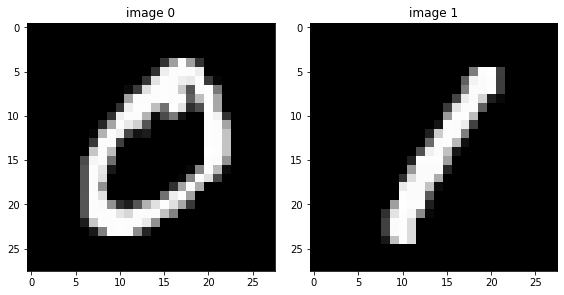

In [77]:
plot_image_gray('image 0', im_0, 'image 1', im_1)

## create color images from gray ones

In [78]:
im_0_red    = np.zeros((im_0.shape[0], im_0.shape[1], 3))
im_0_green  = np.zeros((im_0.shape[0], im_0.shape[1], 3))
im_0_blue   = np.zeros((im_0.shape[0], im_0.shape[1], 3))

im_1_red    = np.zeros((im_1.shape[0], im_1.shape[1], 3))
im_1_green  = np.zeros((im_1.shape[0], im_1.shape[1], 3))
im_1_blue   = np.zeros((im_1.shape[0], im_1.shape[1], 3))

im_0_red[:,:,0]     = im_0
im_0_green[:,:,1]   = im_0
im_0_blue[:,:,2]    = im_0

im_1_red[:,:,0]     = im_1
im_1_green[:,:,1]   = im_1
im_1_blue[:,:,2]    = im_1

In [79]:
print('size of red image for 0 : ', im_0_red.shape)
print('size of green image for 0 : ', im_0_green.shape)
print('size of blue image for 0 : ', im_0_blue.shape)

size of red image for 0 :  (28, 28, 3)
size of green image for 0 :  (28, 28, 3)
size of blue image for 0 :  (28, 28, 3)


## plot color image

In [80]:
def plot_image_color(title1, data1, title2, data2, title3, data3):
    
    size_width  = 12 
    size_height = 4 
    
    fig = plt.figure(figsize=(size_width, size_height))

    rows = 1
    cols = 3

    ax1 = fig.add_subplot(rows, cols, 1)
    ax2 = fig.add_subplot(rows, cols, 2)
    ax3 = fig.add_subplot(rows, cols, 3)
        
    ax1.set_title(title1)
    ax1.imshow(data1, vmin=0, vmax=1)

    ax2.set_title(title2)
    ax2.imshow(data2, vmin=0, vmax=1)
    
    ax3.set_title(title3)
    ax3.imshow(data3, vmin=0, vmax=1)
    
    plt.tight_layout()
    plt.show()

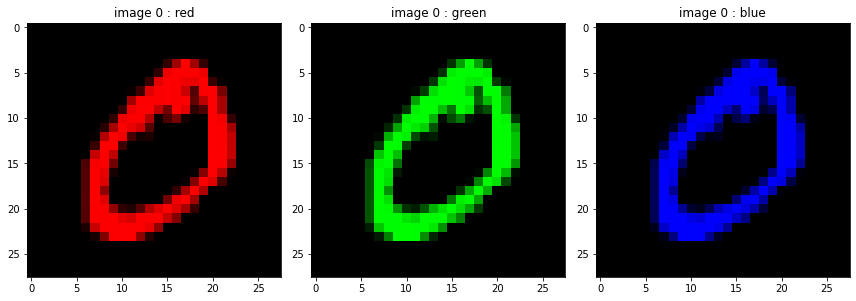

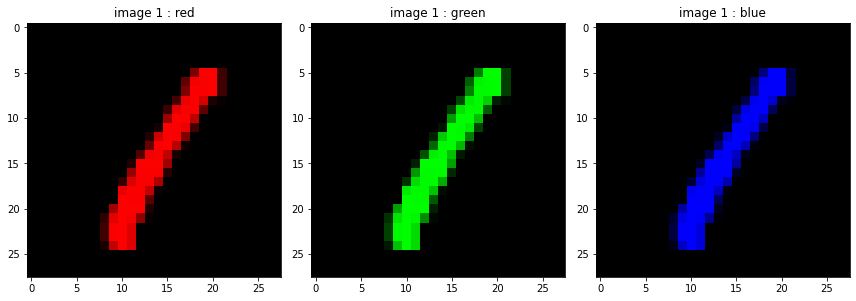

In [81]:
plot_image_color('image 0 : red', im_0_red, 'image 0 : green', im_0_green, 'image 0 : blue', im_0_blue)
plot_image_color('image 1 : red', im_1_red, 'image 1 : green', im_1_green, 'image 1 : blue', im_1_blue)

## initialize input data

- vectorize input image matrices into vectors (row-major order)

In [82]:
# ================================================== 
# fill up the blank
#
#vec_0은 im_0을 vectorize
#vec_1은 im_1을 vectorize
vec_0   = np.matrix.flatten(im_0)
vec_1   = np.matrix.flatten(im_1)
#
# ================================================== 

In [83]:
print('size of vec 0 : ', vec_0.shape)
print('size of vec 1 : ', vec_1.shape)

size of vec 0 :  (784,)
size of vec 1 :  (784,)


## initialize a linear layer for the neural network

- initialize the weights in a fully connected layer (zero matrix)
- dimension
  - input : length of input data
  - output : 1

In [84]:
size_input  = len(vec_0)
size_output = 1

# ================================================== 
# fill up the blank
#
weight = np.zeros((1,size_input))
#
# ================================================== 

In [85]:
print('size of weight : ', weight.shape)

size of weight :  (1, 784)


## define a linear layer 

- input
  - input data
  - dimension : $m \times 1$
- weight
  - weight associated with the layer of the neural network
  - dimension : $p \times m$
- return
  - output of the layer
  - dimension : $p \times 1$

In [86]:
def layer_linear(input, weight):

# ================================================== 
# fill up the blank
#
    output = np.matmul(weight, input)
#
# ================================================== 

    return output

## define sigmoid function 

In [87]:
def activation_sigmoid(input):

# ================================================== 
# fill up the blank
#
    output = np.exp(-1 * input)
    output = 1 / (1+output)
#
# ================================================== 

    return output 

## define forward propagation

In [88]:
def propagation_forward(input, weight):

# ================================================== 
# fill up the blank
#
    output      = layer_linear(input, weight)
    prediction  = activation_sigmoid(output)
#
# ================================================== 

    return prediction 

## define the loss function

- cross entropy between the ground truth and the prediction
- cross entropy : $-y \log(h) - (1-y) \log(1-h)$
  - $y$ : grount truth
  - $h$ : prediction
- output dimension : $1 \times 1$

In [89]:
def compute_loss(prediction, label):

# ================================================== 
# fill up the blank
#

    loss = -1*label*np.log(prediction) - (1-label)*np.log(1-prediction)
#
# ================================================== 

    return loss

## compute the gradient of the loss with respect to the model parameter

In [90]:
def compute_gradient(input, prediction, label):

# ================================================== 
# fill up the blank
#
#residual은 prediction-label
#gradient는 residual * input
    residual    = prediction - label
    gradient    = residual * input
#
# ================================================== 

    return gradient

## gradient descent algorithm

- hyper-parameters

In [91]:
number_iteration    = 500
learning_rate       = 0.01

In [92]:
loss_iter   = np.zeros(number_iteration)
loss_iter_0 = np.zeros(number_iteration)
loss_iter_1 = np.zeros(number_iteration)

pred_iter_0 = np.zeros(number_iteration)
pred_iter_1 = np.zeros(number_iteration)

## run the gradient descent algorithm

In [93]:
for i in range(number_iteration):

# ================================================== 
# fill up the blank
#
    pred_0  = propagation_forward(vec_0, weight)
    loss_0  = compute_loss(pred_0,label_0)
    grad_0  = compute_gradient(vec_0, pred_0, label_0)
    

    pred_1  = propagation_forward(vec_1, weight)
    loss_1  = compute_loss(pred_1, label_1)
    grad_1  = compute_gradient(vec_1, pred_1, label_1)

    loss    = (loss_0+loss_1)/2
    grad    = (grad_0+grad_1)/2
    weight  = weight - learning_rate*grad
#
# ================================================== 

    loss_iter_0[i]  = loss_0 
    loss_iter_1[i]  = loss_1
    loss_iter[i]    = loss

    pred_iter_0[i]  = pred_0
    pred_iter_1[i]  = pred_1

---

## functions for presenting the results

---

In [94]:
def function_result_01():

    title           = 'loss for image 0'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'loss'

    plt.figure(figsize=(8, 6))
    plt.title(title)

# ================================================== 
# fill up the blank
#

    plt.plot(loss_iter_0, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

#
# ================================================== 

    plt.tight_layout()
    plt.show()

In [95]:
def function_result_02():

    title           = 'loss for image 1'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'loss'
     
    plt.figure(figsize=(8, 6))
    plt.title(title)

# ================================================== 
# fill up the blank
#

    plt.plot(loss_iter_1, '-', color='blue')
    plt.xlabel('iteration')
    plt.ylabel('loss')

#
# ================================================== 

    plt.tight_layout()
    plt.show()

In [96]:
def function_result_03():

    title           = 'totla loss'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'loss'

    plt.figure(figsize=(8, 6))
    plt.title(title)

# ================================================== 
# fill up the blank
#

    plt.plot(loss_iter_0, '-', color='red')
    plt.plot(loss_iter_1, '-', color='blue')
    plt.plot(loss_iter, '-', color='green')
    plt.xlabel('iteration')
    plt.ylabel('loss')


#
# ================================================== 

    plt.tight_layout()
    plt.show()

In [97]:
def function_result_04():

    title           = 'prediction for image 0'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'

    plt.figure(figsize=(8, 6))
    plt.title(title)

# ================================================== 
# fill up the blank
#

    plt.plot(pred_iter_0, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('prediction')

#
# ================================================== 
    
    plt.tight_layout()
    plt.show()

In [98]:
def function_result_05():

    title           = 'prediction for image 1'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'

    plt.figure(figsize=(8, 6))
    plt.title(title)

# ================================================== 
# fill up the blank
#

    plt.plot(pred_iter_1, '-', color='blue')
    plt.xlabel('iteration')
    plt.ylabel('prediction')


#
# ================================================== 

    plt.tight_layout()
    plt.show()

In [99]:
def function_result_06():

    title           = 'prediction'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'

    plt.figure(figsize=(8, 6))
    plt.title(title)

# ================================================== 
# fill up the blank
#
    plt.plot(pred_iter_0, '-', color='red')
    plt.plot(pred_iter_1, '-', color='blue')
    plt.xlabel('iteration')
    plt.ylabel('prediction')


#
# ================================================== 

    plt.tight_layout()
    plt.show()

In [100]:
def function_result_07():

    print('prediction = %12.10f' % (pred_iter_0[0]))

In [101]:
def function_result_08():

    print('prediction = %12.10f' % (pred_iter_1[0]))

In [102]:
def function_result_09():

    print('prediction = %12.10f' % (pred_iter_0[-1]))

In [103]:
def function_result_10():

    print('prediction = %12.10f' % (pred_iter_1[-1]))

In [104]:
def function_result_11():

    print('loss = %12.10f' % (loss_iter_0[-1]))

In [105]:
def function_result_12():

    print('loss = %12.10f' % (loss_iter_1[-1]))

In [106]:
def function_result_13():

    print('loss = %12.10f' % (loss_iter[-1]))

---

## results 

---


################################################################################
#
# RESULT # 01
#
################################################################################



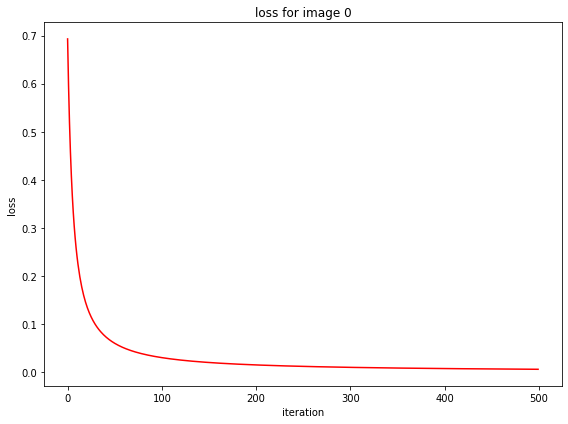


################################################################################
#
# RESULT # 02
#
################################################################################



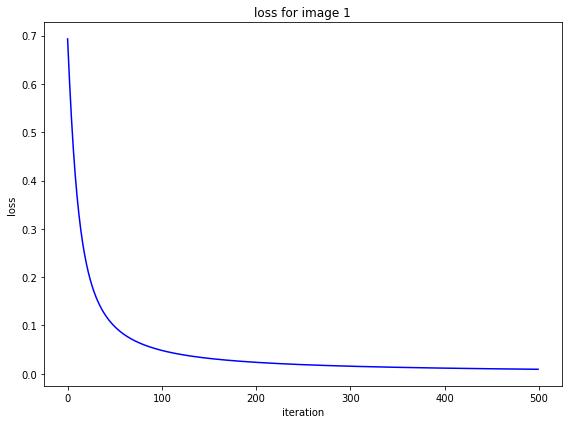


################################################################################
#
# RESULT # 03
#
################################################################################



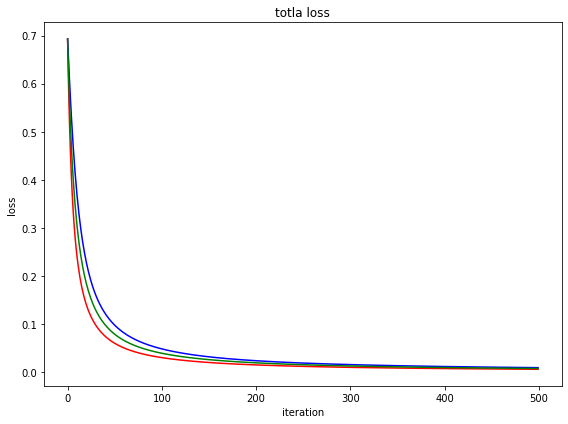


################################################################################
#
# RESULT # 04
#
################################################################################



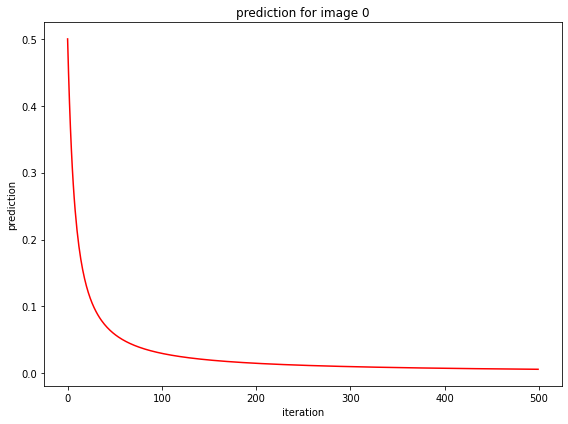


################################################################################
#
# RESULT # 05
#
################################################################################



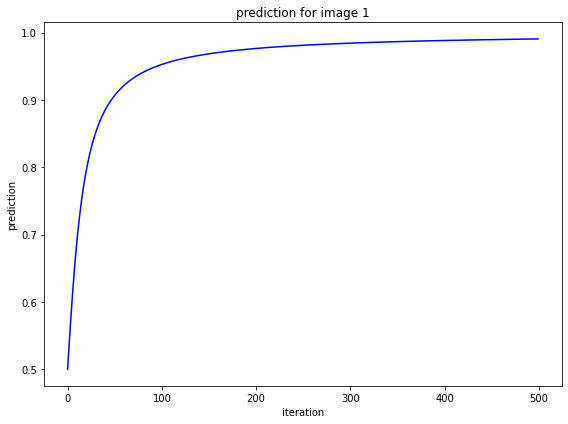


################################################################################
#
# RESULT # 06
#
################################################################################



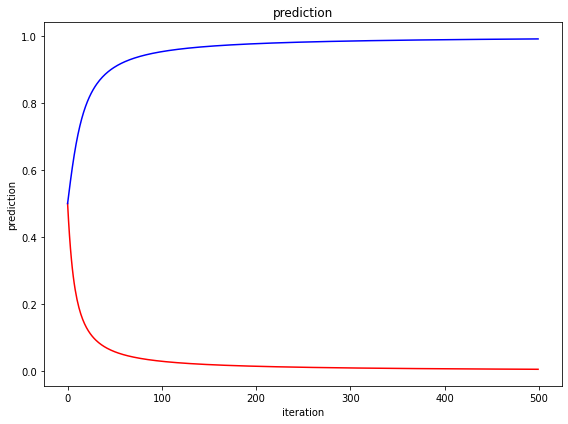


################################################################################
#
# RESULT # 07
#
################################################################################

prediction = 0.5000000000

################################################################################
#
# RESULT # 08
#
################################################################################

prediction = 0.5000000000

################################################################################
#
# RESULT # 09
#
################################################################################

prediction = 0.0058987888

################################################################################
#
# RESULT # 10
#
################################################################################

prediction = 0.9907446562

################################################################################
#
# RESULT # 11
#
####################################################################

In [107]:
number_result = 13

for i in range(number_result):

    title           = '# RESULT # {:02d}'.format(i+1) 
    name_function   = 'function_result_{:02d}()'.format(i+1)

    print('') 
    print('################################################################################')
    print('#') 
    print(title)
    print('#') 
    print('################################################################################')
    print('') 

    eval(name_function)